### **Import**

In [11]:
import pandas as pd 
import numpy as np 

import os
import sys
import warnings
warnings.filterwarnings('ignore')
import sklearn 
from sklearn import model_selection
from sklearn import datasets

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/data/Breast Cancer Wisconsin.csv')

In [14]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### **Statistics basic**

In [15]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


- 순서대로

합계, 평균, 분산, 최솟값, 25퍼 , 50퍼, 75퍼, 최댓값 


---

### **히스토그램(Histogram)**

= 구간화를 시켜주고 구간별 빈도를 출력하는 시각화 기법

분포와 중심 경향을 알 수 있다.




먼저 matplotlib 라이브러리를 불러옵니다.

In [16]:
import matplotlib
import matplotlib.pyplot as plt #파이플롯
%matplotlib inline

(array([ 13.,  48.,  88., 112.,  83.,  57.,  32.,  18.,  24.,  17.,  20.,
         21.,  14.,   5.,   5.,   0.,   4.,   2.,   2.,   1.,   0.,   0.,
          1.,   0.,   2.]),
 array([ 143.5,  237.8,  332.1,  426.4,  520.7,  615. ,  709.3,  803.6,
         897.9,  992.2, 1086.5, 1180.8, 1275.1, 1369.4, 1463.7, 1558. ,
        1652.3, 1746.6, 1840.9, 1935.2, 2029.5, 2123.8, 2218.1, 2312.4,
        2406.7, 2501. ]),
 <a list of 25 Patch objects>)

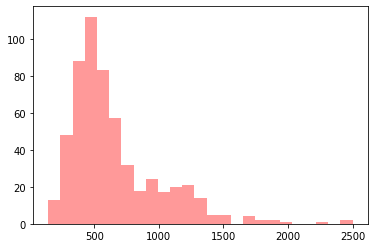

In [17]:
plt.hist(df['area_mean'], alpha=0.4, bins = 25, rwidth =2, color= 'red')
# 연속형 변수에 대한 히스토그램


 bins = 구간 
 
alpha = 흐리게, 투명도 조절

(array([344., 148.,  65.,   9.,   3.]),
 array([ 143.5,  615. , 1086.5, 1558. , 2029.5, 2501. ]),
 <a list of 5 Patch objects>)

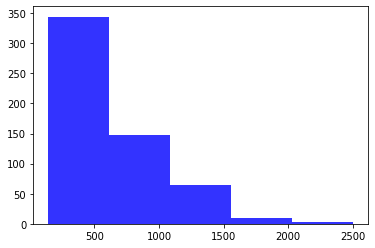

In [18]:
  plt.hist(df['area_mean'], alpha=0.8, bins = 5, rwidth = 1, color= 'blue')

### **Scatter plot  - 산점도** 

*   회귀 분석시에 많이 사용한다.
*   두 연속형 변수의 관계를 알아볼때 사용한다 



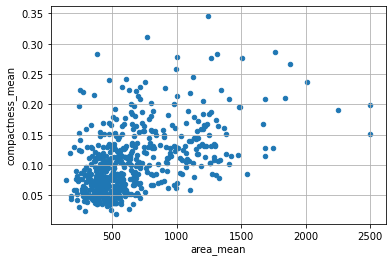

In [19]:
df.plot.scatter(x = 'area_mean', y = 'compactness_mean', grid = True)

양의 상관관계가 있다고 보기는 힘들다.

---



### **Pie Graph 원 그래프** 



*   범주형 변수의 비율을 파이조각조각 처럼 나타내는 방법
*   집단별 표본을 그룹화해서 기술통계량을 볼때 좋다 ~ 



진단별 그룹으로 지정해서 보도록 하겠습니다.

그룹바이 함수를 사용합니다. (범주형)

In [20]:
diagnosis = df.groupby('diagnosis')
diagnosis.describe()

id                                      ... Unnamed: 32            
           count          mean           std     min  ...         25% 50% 75% max
diagnosis                                             ...                        
B          357.0  2.654382e+07  1.167397e+08  8913.0  ...         NaN NaN NaN NaN
M          212.0  3.681805e+07  1.378965e+08  8670.0  ...         NaN NaN NaN NaN

[2 rows x 256 columns]

파이차트를 그려보도록 하겠습니다. 

In [21]:
count = [357.0, 212.0]
labels = ['B','M']
colors = ['red', 'green', 'yellow'] #지정하는 색깔 

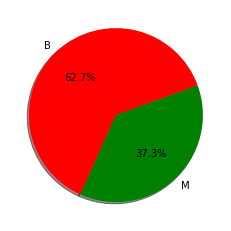

In [23]:
plt.pie(count, labels= labels, colors= colors, autopct ='%1.1f%%', shadow = True, startangle=20);

autopct : None (default), str, or function, optional
    If not *None*, is a string or function used to label the wedges

with their numeric value.  The label will be placed inside the wedge.  If it is a format string, the label will be fmt%pct. 

PCT = 퍼센트 

If it is a function, it will be called.

Yellow 는 지정했지만 나오지 않습니다. 변수가 2개뿐이라서 

그리고 마지막에 ; 를 붙이지 않으면 진행 설명이 계속 뜹니다.




---
### **박스플랏 (상자 그림)**
: 연속형 변수 이상치 찾을때 좋다. 4분위수 파악 가능


이번엔 씨본도 불러온다


In [24]:
import seaborn as sns

In [25]:
#SNS 중독 = 조심하자! 

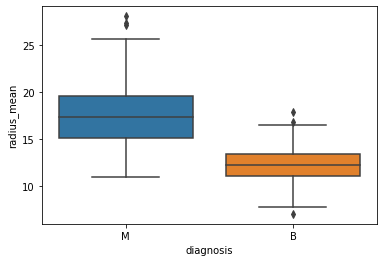

In [28]:
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = df);

범주형 변수를 엑스에 놓고 연속형 변수를 와이에 넣었다. 

위 아래에 찍혀있는 점같은 부분들이 아웃라이어라고 볼 수 있다.

그리고 박스에 3개의 선이 그어져 있는데 

위에서부터 75프로 50프로 25프로 라고 보면 되고 , 3분위 2분위 1분위 이렇게 읽을 수 있다.